# Домашняя работа №2 Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [ ]:
# Сделаем необходимые импорты

In [1]:
import torch
import numpy as np

from torch import nn
from torch import optim

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [ ]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

In [2]:
FOLDER_PATH = 'E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/'
train_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


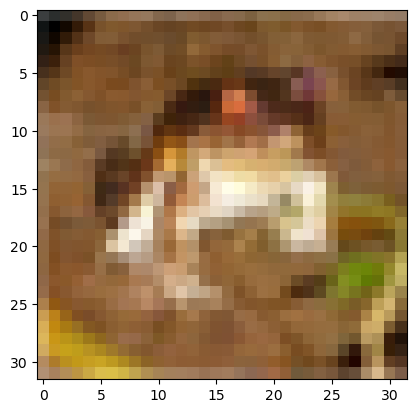

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [5]:
test_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH, 
                                            train=False,
                                            download=True, 
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [ ]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)

In [114]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.softmax(x)
        return x


net = Net(3072, 256, 10)

In [ ]:
# Запустить обучение (по аналогии с тем, что делали на паре)

In [115]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [116]:
from tqdm import tqdm

In [132]:
for epoch in tqdm(range(5)):  
    running_loss = 0.0



    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/5 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.150
[1,   601] loss: 0.151


 20%|██        | 1/5 [00:19<01:16, 19.01s/it]

[2,     1] loss: 0.000
[2,   301] loss: 0.145
[2,   601] loss: 0.148


 40%|████      | 2/5 [00:37<00:56, 18.67s/it]

[3,     1] loss: 0.000
[3,   301] loss: 0.145
[3,   601] loss: 0.144


 60%|██████    | 3/5 [00:55<00:36, 18.19s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.140
[4,   601] loss: 0.144


 80%|████████  | 4/5 [01:13<00:18, 18.18s/it]

[5,     1] loss: 0.000
[5,   301] loss: 0.137
[5,   601] loss: 0.143


100%|██████████| 5/5 [01:31<00:00, 18.23s/it]

Training is finished!


In [124]:
PATH_WEIGHTS = 'E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/cifar_net_weight.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [ ]:
print ('Model state dict:')
for param in net.state_dict():
    print(param, '\t', net.state_dict())

In [151]:
net = Net(3072, 256, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [152]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


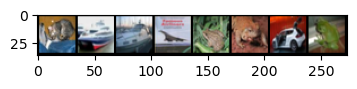

In [153]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(4, 2))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [154]:
net.predict(images);

C:\Users\MSI-1\AppData\Local\Temp\ipykernel_8264\2082658264.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [155]:
_, imgs_predicted = torch.max(outputs, 1)
imgs_predicted

tensor([3, 8, 0, 8, 4, 6, 1, 6])

In [156]:
print('Predicted ', ' '.join(classes[imgs_predicted[j]] for j in range(len(labels))))

Predicted  cat ship plane ship deer frog car frog


In [157]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[imgs_predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'plane' 'ship' 'deer' 'frog' 'car' 'frog']
Accuracy is 0.625


*Переписать туториал на PyTorch

In [159]:
FOLDER_PATH = 'E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/'
train_dataset = torchvision.datasets.MNIST(root=FOLDER_PATH,
                                           train=True,  
                                           transform=transforms.ToTensor(), 
                                           download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw\train-images-idx3-ubyte.gz to E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw\train-labels-idx1-ubyte.gz to E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw\t10k-images-idx3-ubyte.gz to E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw\t10k-labels-idx1-ubyte.gz to E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/MNIST\raw

torch.Size([1, 28, 28])
5


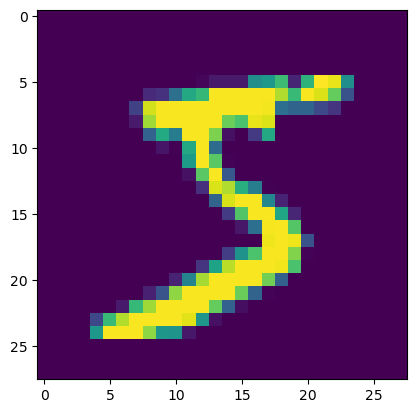

In [160]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [189]:
classes = [str(i) for i in range(0, 10)]

In [161]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [162]:
test_dataset = torchvision.datasets.MNIST(root=FOLDER_PATH, 
                                          train=False,
                                          download=True, 
                                          transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=8,
                                          shuffle=False)

In [172]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.softmax(x)
        return x


net = Net(784, 64, 10)

In [173]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [174]:
net.type(torch.cuda.FloatTensor)
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [175]:
criterion = nn.CrossEntropyLoss().type(torch.cuda.FloatTensor)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [204]:
for epoch in tqdm(range(1)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        inputs_gpu = inputs.to(device)
        labels_gpu = labels.to(device)

        outputs_gpu = net(inputs_gpu)
        loss = criterion(outputs_gpu, labels_gpu)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.to('cpu').item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/1 [00:00<?, ?it/s]

[1,     1] loss: 0.000
[1,   301] loss: 0.105
[1,   601] loss: 0.084
[1,   901] loss: 0.071


100%|██████████| 1/1 [00:08<00:00,  8.64s/it]

Training is finished!


In [205]:
PATH_WEIGHTS = 'E:/Programming/nn_pytorch_intro/Lesson_2_feed_forward_nn_intro/data/mnist_net_weight.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [197]:
net.load_state_dict(torch.load(PATH_WEIGHTS))
net.type(torch.cuda.FloatTensor)
net.to(device)
net

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [206]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  7 2 1 0 4 1 4 9


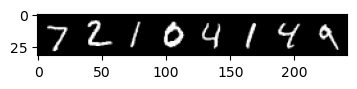

In [207]:
net.eval()
images_gpu = images.to(device)
outputs = net(images_gpu).to('cpu')
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(4, 2))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [208]:
_, imgs_predicted = torch.max(outputs, 1)
imgs_predicted

tensor([7, 2, 1, 0, 4, 1, 4, 9])

In [209]:
print('Predicted ', ' '.join(classes[imgs_predicted[j]] for j in range(len(labels))))

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[imgs_predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

Predicted  7 2 1 0 4 1 4 9
['7' '2' '1' '0' '4' '1' '4' '9']
['7' '2' '1' '0' '4' '1' '4' '9']
Accuracy is 1.0
